### References:
- https://en.wikipedia.org/wiki/Ellipsoid

$$\frac{x^2}{a^2} + \frac{y^2}{b^2} + \frac{z^2}{c^2} = 1$$

If $a=b>c$ one has an oblate spheroid; if $a=b<c$, one has a prolate spheroid; if $a=b=c$, one has a sphere.

The ellipsoid may be parameterized in several ways, which are simpler to express when the ellipsoid axes coincide with coordinate axes. A common choice is:

$$\begin{array}\\
x &=& a \sin(\theta)\cos(\phi)\\
y &=& b \sin(\theta)\sin(\phi)\\
z &=& c \cos(\theta)
\end{array}$$

where $0≤\theta≤\pi$, $0≤\phi<2\pi$.

### Useful packages

In [69]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from SettingPLOTs import *

π = np.pi

### Defining ellipsoids

In [70]:
def ellip3d(a, b, c):
    """
    a, b, c are positive real numbers
    """
    N = 100
    ϕ = np.linspace(0, 2*π, N)
    θ = np.linspace(0, π, N)

    x = a * np.outer(np.cos(ϕ), np.sin(θ))
    y = b * np.outer(np.sin(ϕ), np.sin(θ))
    z = c * np.outer(np.ones_like(ϕ), np.cos(θ))
    
    return x, y, z

### Plotting

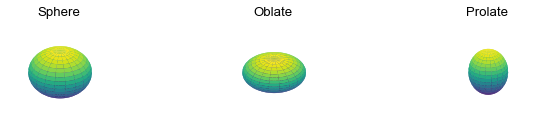

In [156]:
fig = plt.figure(figsize=cm2inch(25,5))

m, δ = 4, 1.5
color_map = 'viridis'

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(*ellip3d(m, m, m), rstride=5, cstride=5, cmap=color_map)
ax1.set_title('Sphere')
ax1.axis('off')

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(*ellip3d(m, m, m-δ), rstride=5, cstride=5, cmap=color_map)
ax2.set_title('Oblate')
ax2.axis('off')

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(*ellip3d(m-δ, m-δ, m), rstride=5, cstride=5, cmap=color_map)
ax3.set_title('Prolate')
ax3.axis('off')

for ii in [ax1, ax2, ax3]:
    for axis in 'xyz':
        getattr(ii, 'set_{}lim'.format(axis))((-4, 4))

plt.tight_layout()
plt.savefig('./Figures/ellipsoids.svg')
plt.show()